In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
input_id = 2
folds = 5
clf_name = 'Neural_Net'
granularity = 4
N_PCs = 3

# Get model

In [80]:
variance_held = []
sensors_contribution = []
features_contribution = []
selected_features = []

for it in range(folds):
    with open('models/LathesModel__input_train_{}__fold_{}__gra_{}__PCs_{}__{}.pkl'.format(input_id, it, 
                                                                  granularity,
                                                                  N_PCs,
                                                                  clf_name), 'rb') as f:
        model = pickle.load(f)
    
    model._create_eigen_matrix()
    
    selected_features.append(model.X_selected_.shape[1])
    variance_held.append(model.variation_kept_)
    sensors_contribution.append(model.sensors_contribution_)
    features_contribution.append(model.features_contribution_)

# Plot variance held

In [81]:
variance_held = np.array(variance_held)

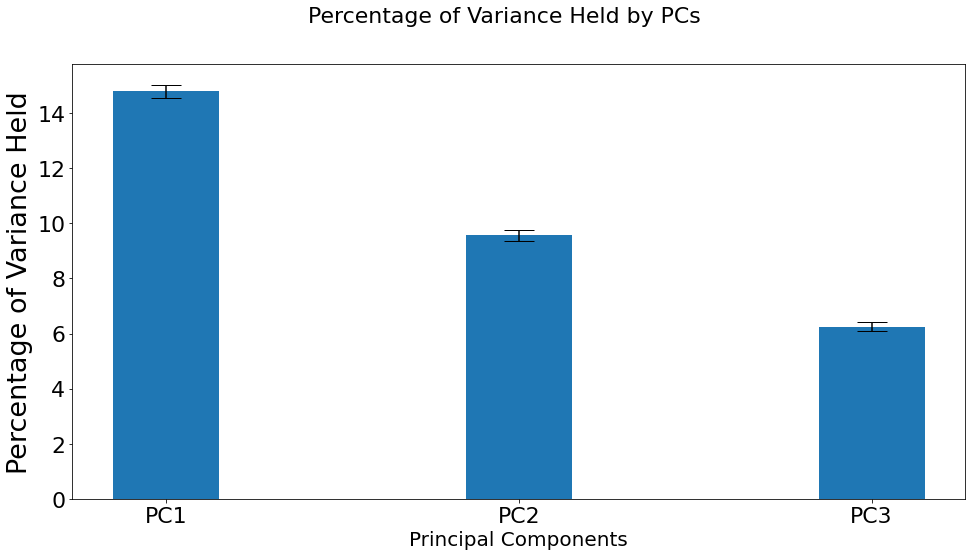

In [82]:
fig = plt.figure(figsize=[16,8])
fig.suptitle('Percentage of Variance Held by PCs', fontsize=22)
ax = fig.subplots(1,1)

ax.bar(x=['PC' + str(x) for x in range(1,(N_PCs+1))],height=variance_held.mean(0), 
       yerr=variance_held.std(0), error_kw={'capsize':15, 'ecolor':'k', 'alpha':1}, width=.3)

ax.set_ylabel('Percentage of Variance Held',fontsize=27)
ax.set_xlabel('Principal Components',fontsize=20)
ax.tick_params(axis='x', labelsize=22)
ax.tick_params(axis='y', labelsize=22)
#ax.grid()
plt.show()
#fig.savefig(PATH, bbox_inches='tight')

# plot sensors contribution

In [83]:
sensors_contribution = pd.DataFrame(sensors_contribution)
sensors_contribution

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6
0,21.993319,17.352681,22.521360,9.843262,16.544214,11.745164
1,24.432195,15.196245,21.461563,10.571349,16.917039,11.421610
2,25.674955,16.852071,18.283644,10.073644,16.759642,12.356044
3,24.122563,16.483009,22.026227,10.573150,14.817079,11.977972
4,26.551042,14.379645,21.988214,10.364822,14.744279,11.971999


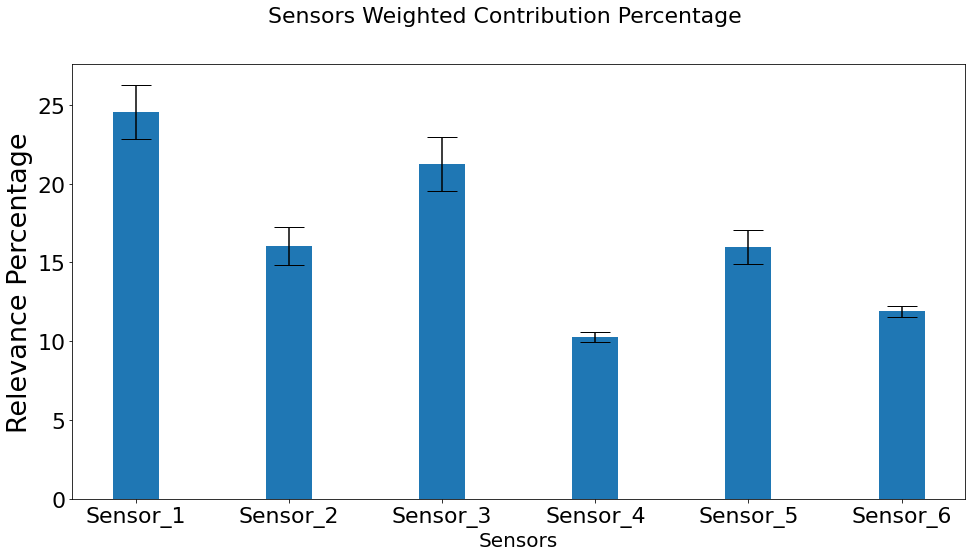

In [84]:
fig = plt.figure(figsize=[16,8])
fig.suptitle('Sensors Weighted Contribution Percentage', fontsize=22)
ax = fig.subplots(1,1)

ax.bar(x=sensors_contribution.columns,height=sensors_contribution.mean(0), 
       yerr=sensors_contribution.std(0), error_kw={'capsize':15, 'ecolor':'k', 'alpha':1}, width=.3)

ax.set_ylabel('Relevance Percentage',fontsize=27)
ax.set_xlabel('Sensors',fontsize=20)
ax.tick_params(axis='x', labelsize=22)
ax.tick_params(axis='y', labelsize=22)
#ax.grid()
plt.show()
#fig.savefig(PATH, bbox_inches='tight')

# plot features contribution

In [85]:
features_contribution = pd.DataFrame(features_contribution)
features_contribution = features_contribution.fillna(0)

features_contribution

,abs_energy,absolute_sum_of_changes,"agg_autocorrelation__f_agg_""mean""__maxlag_40","agg_autocorrelation__f_agg_""median""__maxlag_40","agg_autocorrelation__f_agg_""var""__maxlag_40","agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""max""","agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""mean""","agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""min""","agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""var""","agg_linear_trend__attr_""intercept""__chunk_len_50__f_agg_""max""",...,"cwt_coefficients__coeff_6__w_5__widths_(2, 5, 10, 20)","fft_coefficient__attr_""abs""__coeff_44","fft_coefficient__attr_""abs""__coeff_92","cwt_coefficients__coeff_12__w_20__widths_(2, 5, 10, 20)","cwt_coefficients__coeff_13__w_5__widths_(2, 5, 10, 20)","fft_coefficient__attr_""abs""__coeff_46","fft_coefficient__attr_""abs""__coeff_79","fft_coefficient__attr_""abs""__coeff_82","fft_coefficient__attr_""angle""__coeff_51","fft_coefficient__attr_""real""__coeff_84"
0,0.734560,0.986601,0.695051,0.922608,0.789999,0.532285,0.424614,0.280077,0.616004,0.366890,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.572315,0.851007,0.714733,0.944731,0.791241,0.613973,0.436811,0.283648,0.601219,0.407517,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.541845,0.987746,0.654924,0.887860,0.755105,0.634451,0.422803,0.273854,0.589024,0.379402,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.429780,0.947494,0.733939,0.948378,0.913804,0.508362,0.420200,0.073399,0.463213,0.345438,...,0.119324,0.047983,0.039617,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.608066,0.954492,0.674305,0.902815,0.755845,0.599433,0.414888,0.282531,0.438621,0.374594,...,0.127936,0.000000,0.000000,0.092163,0.042233,0.052313,0.066054,0.060708,0.048576,0.043531


In [86]:
mean_features_contribution = features_contribution.mean(0)

mean_features_contribution = mean_features_contribution.sort_values(ascending=False)

std_features_contribution = features_contribution.std(0)

std_features_contribution = std_features_contribution[mean_features_contribution.index]

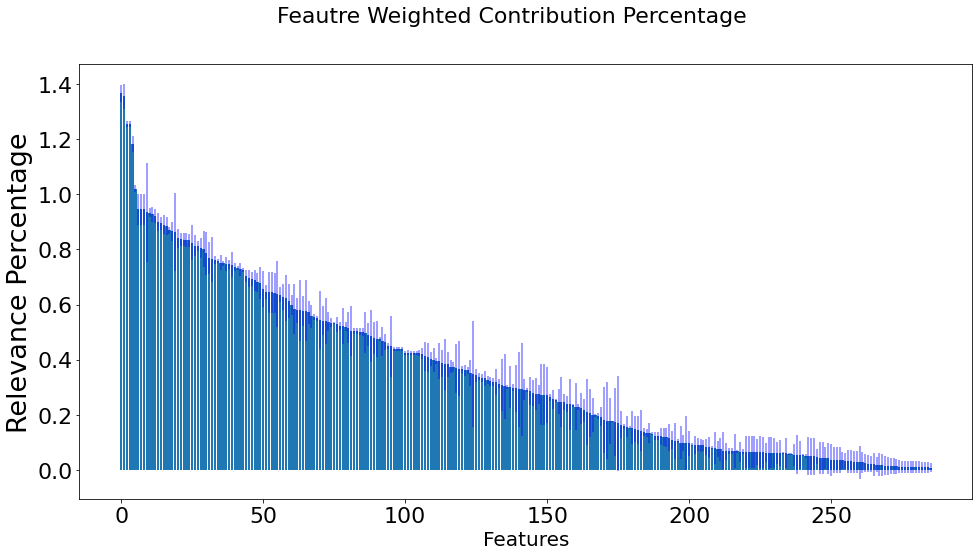

In [87]:
fig = plt.figure(figsize=[16,8])
fig.suptitle('Feautre Weighted Contribution Percentage', fontsize=22)
ax = fig.subplots(1,1)

ax.bar(x=np.arange(len(mean_features_contribution)),height=mean_features_contribution, 
       yerr=std_features_contribution, error_kw={'ecolor':'blue', 'alpha':.5})

ax.set_ylabel('Relevance Percentage',fontsize=27)
ax.set_xlabel('Features',fontsize=20)
ax.tick_params(axis='x', labelsize=22)
ax.tick_params(axis='y', labelsize=22)
#ax.grid()
plt.show()
#fig.savefig(PATH, bbox_inches='tight')

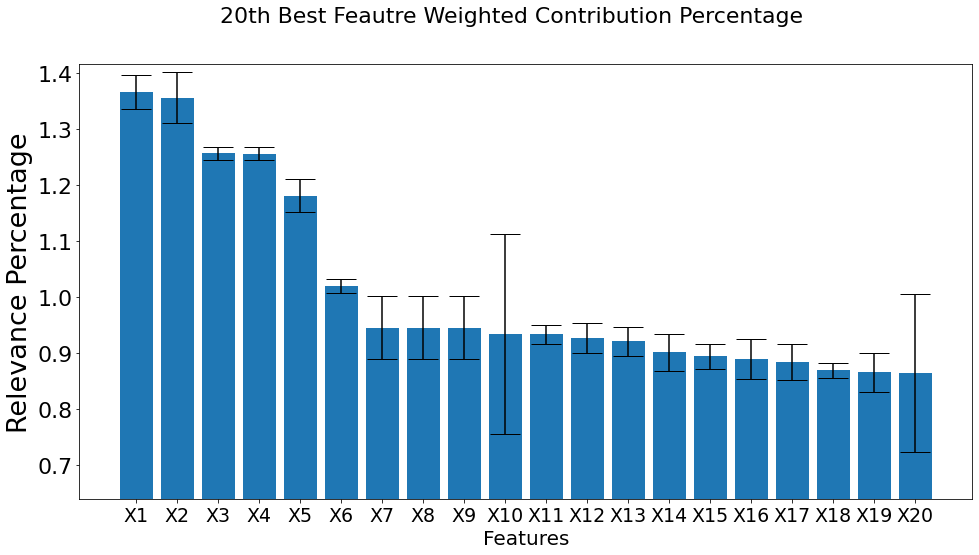

In [105]:
fig = plt.figure(figsize=[16,8])
fig.suptitle('20th Best Feautre Weighted Contribution Percentage', fontsize=22)
ax = fig.subplots(1,1)

ax.bar(x=['X{}'.format(i) for i in range(1,21)],height=mean_features_contribution[:20], 
       yerr=std_features_contribution[:20], error_kw={'capsize':15,'ecolor':'k', 'alpha':1})

ax.set_ylabel('Relevance Percentage',fontsize=27)
ax.set_xlabel('Features',fontsize=20)
ax.tick_params(axis='x', labelsize=19)
ax.tick_params(axis='y', labelsize=22)
ax.set_ylim([mean_features_contribution[20]-0.2,mean_features_contribution[0]+0.05])
#ax.grid()
plt.show()
#fig.savefig(PATH, bbox_inches='tight')

# Number of selected Features

In [89]:
selected_features

[759, 750, 756, 773, 757]

In [90]:
np.mean(selected_features)

759.0

In [100]:
len(model.valid_columns_)

4680

# Plot 3 best features

In [113]:
best_features = mean_features_contribution.keys()[:3]

best_sensor = sensors_contribution.mean().sort_values(ascending=False).keys()[0]

In [119]:
features = []
for f in best_features:
    features.append(best_sensor+'__'+f)

In [134]:

from matplotlib.lines import Line2D

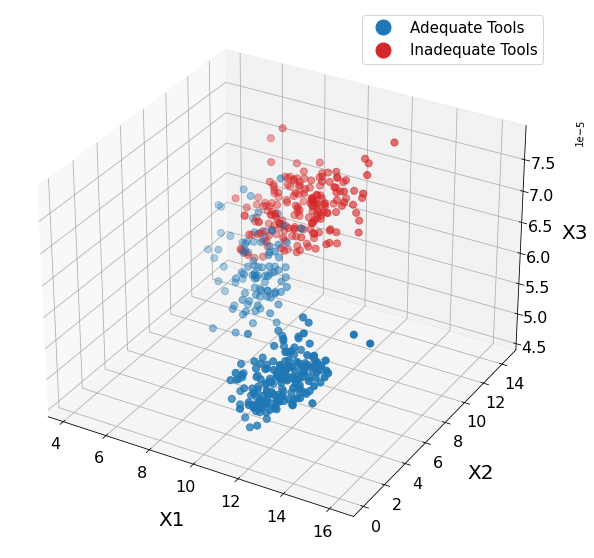

In [145]:
x = model.X_selected_[features[0]].values
y = model.X_selected_[features[1]].values
z = model.X_selected_[features[2]].values

target = model.target_

fig = plt.figure(figsize=[14,10])
ax = fig.add_subplot(111, projection='3d')

colors = pd.Series(target)
colors[target==0] = 'tab:blue'
colors[target==1] = 'tab:red'

ax.scatter(x, y, z, c=colors, s=50, cmap='seismic')
                    
plt.ylabel('X2',fontsize=20,labelpad=18)
plt.xlabel('X1',fontsize=20, labelpad=18)
ax.set_zlabel('X3', fontsize=20, labelpad=12)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.tick_params(axis='z', labelsize=16)

legend_elements = [Line2D([0], [0], marker='o', color='tab:blue', linestyle='None', 
                          markersize=15, label='Adequate Tools'),
                   Line2D([0], [0], marker='o', color='tab:red', linestyle='None', 
                          markersize=15, label='Inadequate Tools')]

plt.legend(handles=legend_elements, fontsize=15)

ax.grid()
plt.show()

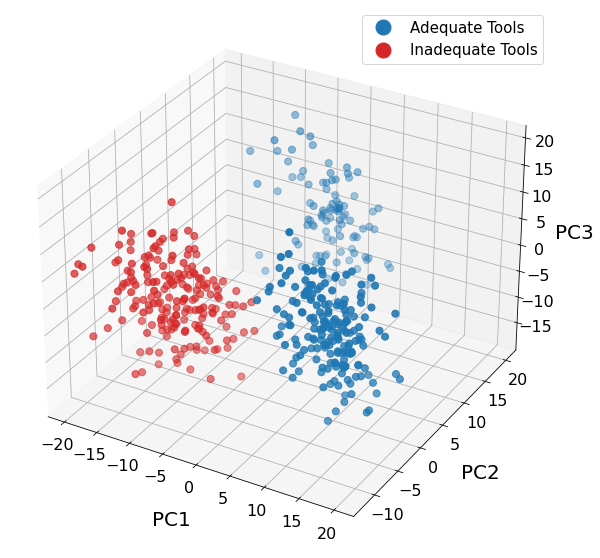

In [146]:
x = model.X_projected_[:,0]
y = model.X_projected_[:,1]
z = model.X_projected_[:,2]

target = model.target_

fig = plt.figure(figsize=[14,10])
ax = fig.add_subplot(111, projection='3d')

colors = pd.Series(target)
colors[target==0] = 'tab:blue'
colors[target==1] = 'tab:red'

ax.scatter(x, y, z, c=colors, s=50, cmap='seismic')
                    
plt.ylabel('PC2',fontsize=20,labelpad=18)
plt.xlabel('PC1',fontsize=20, labelpad=18)
ax.set_zlabel('PC3', fontsize=20, labelpad=12)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.tick_params(axis='z', labelsize=16)

legend_elements = [Line2D([0], [0], marker='o', color='tab:blue', linestyle='None', 
                          markersize=15, label='Adequate Tools'),
                   Line2D([0], [0], marker='o', color='tab:red', linestyle='None', 
                          markersize=15, label='Inadequate Tools')]

plt.legend(handles=legend_elements, fontsize=15)

ax.grid()
plt.show()

In [144]:
list(mean_features_contribution.keys()[:20])

['fft_coefficient__attr_"abs"__coeff_4',
 'fft_coefficient__attr_"abs"__coeff_3',
 'agg_linear_trend__attr_"stderr"__chunk_len_5__f_agg_"mean"',
 'agg_linear_trend__attr_"stderr"__chunk_len_10__f_agg_"mean"',
 'fourier_entropy__bins_2',
 'agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"mean"',
 'change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.0',
 'mean_abs_change',
 'absolute_sum_of_changes',
 'spkt_welch_density__coeff_2',
 'fft_coefficient__attr_"abs"__coeff_2',
 'quantile__q_0.9',
 'agg_autocorrelation__f_agg_"median"__maxlag_40',
 'autocorrelation__lag_9',
 'quantile__q_0.8',
 'autocorrelation__lag_5',
 'autocorrelation__lag_2',
 'ar_coefficient__coeff_0__k_10',
 'autocorrelation__lag_4',
 'quantile__q_0.1']